# Stackoverflow Survey Analysis
### By: Bladimir Nunez
### Last Updated: March 19th, 2024

# Table of Contents
* Project Description
* Data Sources
* Data Collection
* Data Exploration
* Data Cleaning 
* Data Analysis (Data Visualization)
* Conclusion


## Project Description
In this project I analyze data from a stack overflow survey that was conducted in May of 2023 from May 8th - May 19th to find out information on software developers such as salary, how they like to learn how to code and favorite technolgies used. Questions I will be answering in this analysis are:

 1. In what Industries do developers get paid the most?
 2. How much does remote working matter to employees?
 3. How does coding experience affect the level of pay?
 4. What is the most popular method of learning to code?
 5. Are you more likely to get a developer role with a masters degree?


## Data Sources

survey_results_public.csv: CSV file from stack overflow website survey:https://insights.stackoverflow.com/survey 

## Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import warnings
warnings.simplefilter(action='ignore', category=Warning)

df = pd.read_csv('survey_results_public.csv')
df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


## Exploratory Data Analysis (Data Exploration)

In [2]:
# Get some information about columns in my dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [3]:
# get some summary statistics about the dataset

df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [4]:
# Check for duplication in data set

df.nunique()

ResponseId             89184
Q120                       1
MainBranch                 6
Age                        8
Employment               106
                       ...  
ProfessionalTech         284
Industry                  12
SurveyLength               3
SurveyEase                 3
ConvertedCompYearly     8784
Length: 84, dtype: int64

In [5]:
# Identify null values in each column 
df.isnull().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

## Data Cleaning

In [6]:
# Drop all unnecessary columns in dataset

df.drop(df.iloc[:, 21:78], inplace=True, axis=1)
df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,BuyNewTool,Country,Currency,CompTotal,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.850000e+05,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.500000e+05,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,1.560000e+05,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,Start a free trial;Ask developers I know/work ...,Philippines,PHP\tPhilippine peso,1.320000e+06,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,Brazil,BRL\tBrazilian real,2.000000e+05,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,Start a free trial;Ask developers I know/work ...,Romania,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,Israel,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documenta

In [7]:
# Continue to drop columns 

pd.set_option('display.max_columns', None)
df.drop(df.columns[[0, 1, 2,6,9,10,11,14,15,16,17,20,21,22,24,25]], axis=1, inplace=True)
df

,Age,Employment,RemoteWork,EdLevel,LearnCode,YearsCodePro,DevType,Country,Currency,Industry,ConvertedCompYearly
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD\tUnited States dollar,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,23,"Developer, back-end",United States of America,USD\tUnited States dollar,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,7,"Developer, front-end",United States of America,USD\tUnited States dollar,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,4,"Developer, full-stack",Philippines,PHP\tPhilippine peso,Other,23456.0
...,...,...,...,...,...,...,...,...,...,...,...
89179,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,5,"Developer, front-end",Brazil,BRL\tBrazilian real,NaN,NaN
89180,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,NaN,"Developer, back-end",Romania,NaN,NaN,NaN
89181,Prefer not to say,I prefer not to say,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,NaN,Israel,NaN,NaN,NaN
89182,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,NaN,System administrator,Switzerland,NaN,NaN,NaN


In [8]:
# remove any duplicate values 
df.drop_duplicates(inplace = True)
df

,Age,Employment,RemoteWork,EdLevel,LearnCode,YearsCodePro,DevType,Country,Currency,Industry,ConvertedCompYearly
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD\tUnited States dollar,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,23,"Developer, back-end",United States of America,USD\tUnited States dollar,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,7,"Developer, front-end",United States of America,USD\tUnited States dollar,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,4,"Developer, full-stack",Philippines,PHP\tPhilippine peso,Other,23456.0
...,...,...,...,...,...,...,...,...,...,...,...
89179,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,5,"Developer, front-end",Brazil,BRL\tBrazilian real,NaN,NaN
89180,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,NaN,"Developer, back-end",Romania,NaN,NaN,NaN
89181,Prefer not to say,I prefer not to say,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,NaN,Israel,NaN,NaN,NaN
89182,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,NaN,System administrator,Switzerland,NaN,NaN,NaN


In [9]:
# drop first row due to participant not answering needed questions for analysis
df = df.iloc[1:]
df

,Age,Employment,RemoteWork,EdLevel,LearnCode,YearsCodePro,DevType,Country,Currency,Industry,ConvertedCompYearly
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD\tUnited States dollar,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,23,"Developer, back-end",United States of America,USD\tUnited States dollar,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,7,"Developer, front-end",United States of America,USD\tUnited States dollar,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,4,"Developer, full-stack",Philippines,PHP\tPhilippine peso,Other,23456.0
5,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,21,"Developer, back-end",United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,Other,96828.0
...,...,...,...,...,...,...,...,...,...,...,...
89179,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,5,"Developer, front-end",Brazil,BRL\tBrazilian real,NaN,NaN
89180,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,NaN,"Developer, back-end",Romania,NaN,NaN,NaN
89181,Prefer not to say,I prefer not to say,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,NaN,Israel,NaN,NaN,NaN
89182,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,NaN,System administrator,Switzerland,NaN,NaN,NaN


In [10]:
# yearsCodePro column replace null values with 0 to indicate participant has 0 years of professional experience
df['YearsCodePro'] = df['YearsCodePro'].fillna(0)

# Industry column replace null values with 'Other'
df['Industry'].fillna('Other',inplace=True)

# RemoteWork column replace null values with 'No response'
df['RemoteWork'].fillna('No Response',inplace=True)

# ConvertedCompyearly column replace nulls with 0 to indicate participant didnt add comp salary
df['ConvertedCompYearly'].fillna(0,inplace=True)
df['Currency'].fillna('No Response',inplace=True)
df['DevType'].fillna('No Response',inplace=True)
df['EdLevel'].fillna('No Response',inplace=True)



In [11]:
# Clean columns
# Remove parentheses and unrelevant info in columns

# Edlevel column
df['EdLevel'] = df['EdLevel'].str.replace(r"\(.*?\)", "", regex=True)

# RemoteWork column
df['RemoteWork'] = df['RemoteWork'].str.replace(r"\(.*?\)", "", regex=True)

# Age column
df['Age'] = df['Age'].str.replace(r"years old", "", regex=True)

# DevType Column
df['DevType'] = df['DevType'].str.replace(r"\(.*?\)", "", regex=True)
df['DevType'] = df['DevType'].str.replace(r"Developer,","",regex=True)

#Currency Column
df['Currency'] = df['Currency'].str.replace(r"(\t).*","",regex=True)

# Industry Column
df['Industry'] = df['Industry'].str.replace(r"(,).*","",regex=True)

# LearnCode Column
df['LearnCode'] = df['LearnCode'].str.replace(r"(/).*","",regex=True)
df['LearnCode'] = df['LearnCode'].str.replace(r"(;).*","",regex=True)

# remoteWork column convert values to lowercase and trim whitespace 
df['RemoteWork'] = df['RemoteWork'].str.lower()
df['RemoteWork'] = df['RemoteWork'].str.strip()



## Data Analysis (Data Visualization)

### 1.) In what Industries do developers get paid the most ?

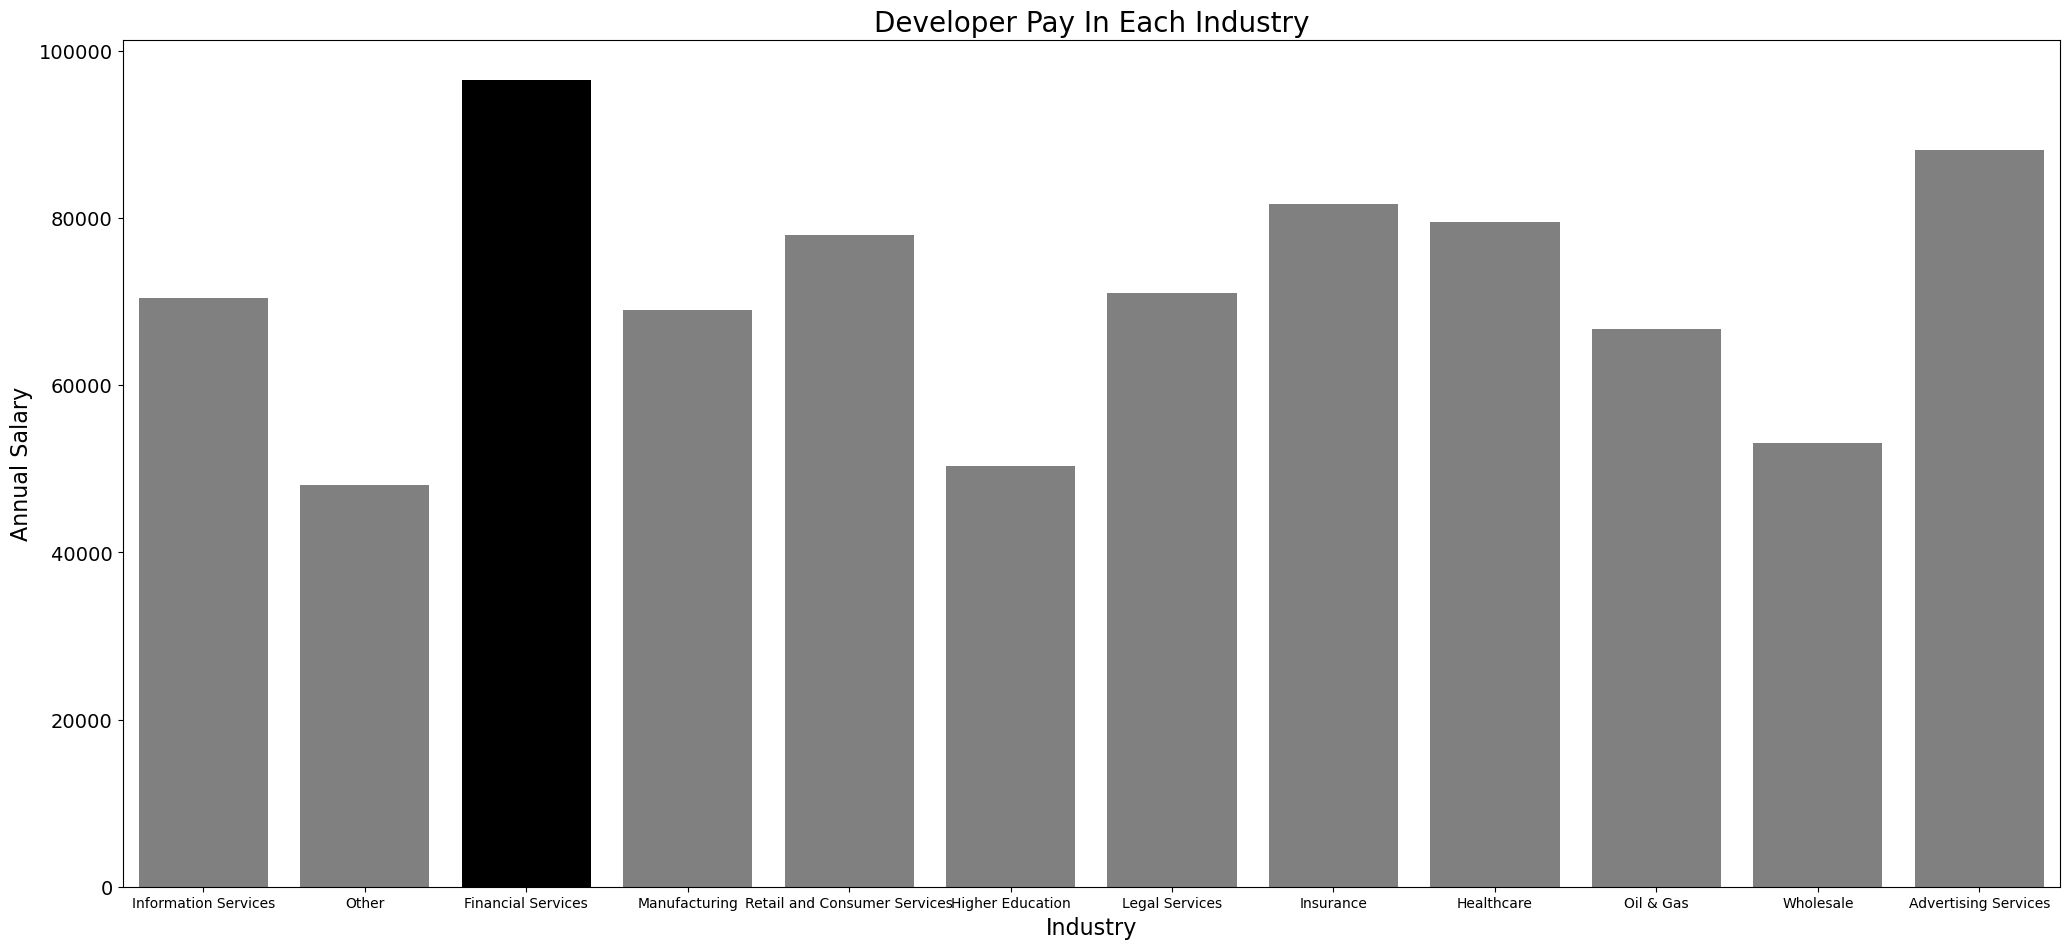

In [12]:

# Highlight financial services bar to show the most lucrative industry
colors = ['grey' if i != 2 else 'black' for i in range(len(df))]

# Size barchart
plt.figure(figsize=(25, 11))
sns.barplot(x='Industry', y='ConvertedCompYearly', data=df,palette=colors,ci=None)
plt.yticks(fontsize=14)

# Label bar chart
plt.xlabel('Industry',fontsize=16)
plt.ylabel('Annual Salary',fontsize=16)
plt.title('Developer Pay In Each Industry', fontsize=20)

# show plot
plt.show()

### 2.) How much does remote working matter to employees?

In [13]:
# Create table to show amount of developers working remote, hybrid and in-person

df.groupby('RemoteWork').size().to_frame(name='Count').sort_values(by='Count', ascending=False)

        

,Count
RemoteWork,
hybrid,31063
remote,30540
in-person,12075
no response,11149


### 3.) How does coding experience affect level of pay?

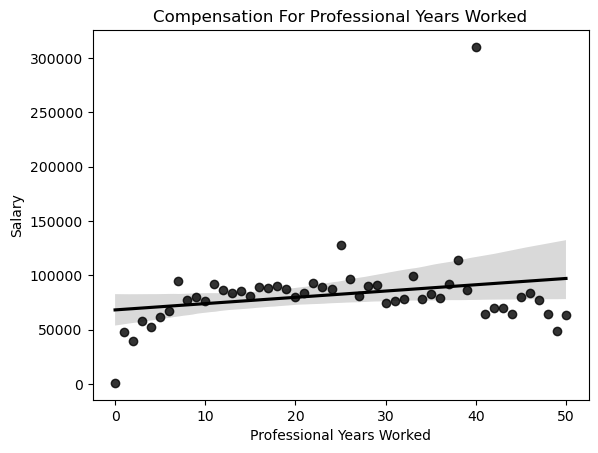

In [19]:
def clean_data(value):
  # Remove leading/trailing spaces and any non-numeric characters
  value = str(value).strip()
  value = re.sub(r"[^\d\-+\.]", "", value)  # Remove non-numeric characters except .,-
  return value

df['ConvertedCompYearly'] = df['ConvertedCompYearly'].apply(clean_data)
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_data)

# Convert data types to float
df[['ConvertedCompYearly', 'YearsCodePro']] = df[['ConvertedCompYearly', 'YearsCodePro']].astype(float)

# Create regression plot to show correlation between variables
aggregated_df = df.groupby('YearsCodePro')['ConvertedCompYearly'].mean().reset_index()
sns.regplot(x='YearsCodePro', y='ConvertedCompYearly', data=aggregated_df, color='black')

plt.title('Compensation For Professional Years Worked')
plt.ylabel('Salary')
plt.xlabel('Professional Years Worked')
plt.show()




### 4.) Whats the most popular method of learning how to code?

In [26]:
# group by methods of code learning and get the count for each
df.groupby('LearnCode').size().to_frame(name='Count').sort_values(by='Count', ascending=False)


,Count
LearnCode,
Books,44475
Online Courses or Certification,12215
"Other online resources (e.g., videos, blogs, forum)",7808
Colleague,7435
On the job training,5569
Friend or family member,2354
"School (i.e., University, College, etc)",2264
Hackathons (virtual or in-person),1527
Other (please specify):,647


### 5.) Are you more likely to get a developer role with a masters degree?

In [30]:
df.groupby(['EdLevel']).size().to_frame(name='Count').sort_values(by='Count', ascending=False)

,Count
EdLevel,
Bachelor’s degree,36037
Master’s degree,20465
Some college/university study without earning a degree,11250
Secondary school,7402
Professional degree,3883
Associate degree,2780
Primary/elementary school,1555
Something else,1448
No Response,7


## Conclusion/Insights

* Developers get paid the most in the financial industry with an average salary of $95,000

* 31000 people work in hybrid setting and 30000 people are fully remote. Only 12,000 people are fully in person. 
this shows that developers prefer working remote or having a hybrid schedule.

* There is a positive correlation with with compensation as you have more work experience and the highest paid       developer in this dataset was at $300,000 with 40 years of experience. 
    
* The most popular method of learning how to code is through books. 44,000 people agreed with this method.

* Most developers in our survey had bachelors degrees then masters. From analysis you do not need a masters to        get a developer role. 